# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: We want to see the relationship between GPA, GRE and the Prestige of an undergraduate school on whether a student is admitted to a graduate program.  

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: Our GPA is a contiuous range of numbers possibly between 0 and 4.  Our GRE is a continous range between 220 and 800.  The prestige of the undergraduate is a discrete number in buckets, either 1,2,3,4.  There were some missing variables in our data.  Since the number of observations with missing data was small we decided to drop those observations from our model.  We could have also calculated the mean of the data and put that in the missing data of the observation.  

### Demo: Provide a table that explains the data by admission status


%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np



/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 

### Methods: Write up the methods used in your analysis

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admitted, 1 = admitted | categorical
gre | GRE score | continuous 
gpa | Grade Point Average | continuous
prestige |rank of undergrad school with integer values 1-4 (1 = highest, 4 = lowest) | categorical

Answer: First we explored the data. We created a data dictionary to give us an overview of our data. We used summary statistics via df.describe() to get an idea of mean, std deveation, as well as how many values were in each column. In addition, we used a correlation heatmap to see how related the data columns were to one another and determine whether we would have to omit any from our model due to colinearity. Another way we explored the data was by plotting histograms of each column to view the distribution of the data. We also used functions like value_counts() to determine the various elements of each column and their frequencies.

Next, we prepared the data to be fed into the model. We cleaned the data using dropna() to get rid of any missing values in our data, so that we don't have any incomplete entries when we create our model. Also, given the nature of our categorical variable (prestige), we had to implement a dummy variable using pandas's get_dummies() function so that we didn't create any unnecessary relationship between our categories. After preparing our data, we grouped them (in my case, defiantly) into train_columns (a list of columns to be used as independent variables) that we set as our X value, and our dependent variable (admit) to y.

Finally, we ran a logistic regression on the data (sm.Logit(y,X).fit().summary()) to provide coefficients for our independent variables. We then interpreted these coefficients to give us an idea on how the odds of being admitted vary given a change in any of our independent variables.

### Results: Write up your results

In [3]:
prestige_dummies = pd.get_dummies(df['prestige'], prefix='prestige')
new_df = df[['admit','gpa','gre']].join(prestige_dummies.loc[:, 'prestige_2':])
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_dummies.loc[:, 'prestige_2':])
data['intercept'] = 1.0
train_columns = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept']
X = data[train_columns]
X = sm.add_constant(X)
y = data['admit']

logit = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [ ]:
logit.summary()

Answer: Looking at the coefficients' p-values, we can see that all of their p-values fall below the 0.05 threshold, meaning that they are all statistically significant (in addition their confidence intervals don't cross 0).

Now looking at the coefficients themselves, we can see their impact on the odds of admission. For gre nad gpa, one point of increase yields an increase of 0.0022 and 0.7793 in the log odds of being admitted. Looking at the various prestige levels, we can generalize that for any school that is not rank 1 prestige, there is a decrease in the log odds of beign admitted (and common-sensibly, the lower the rank, the more the log odds drop). We can also look at the confidence intervals to see the range of values that these coefficients can take on.

If we wanted to take this further, we could calculate the probability of acceptance for each data point and add it as another column to the dataframe. With this we could see the extent to which the odds fluctuate for a certain change.

### Visuals: Provide a table or visualization of these results

In [4]:
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n // arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [5]:
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print (gres)
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print (gpas)
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [6]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
prestige_dummies = pd.get_dummies(combos['prestige'], prefix='prestige')
prestige_dummies.columns = ['prestige_1.0','prestige_2.0','prestige_3.0','prestige_4.0']

keep_col = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[keep_col].join(prestige_dummies.loc[:,'prestige_2.0':])

In [7]:
combos['predicted_prob'] = logit.predict(combos[train_columns])
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,predicted_prob
0,220.0,2.260000,1.0,1.0,0,0,0,0.164173
1,220.0,2.260000,2.0,1.0,1,0,0,0.090492
2,220.0,2.260000,3.0,1.0,0,1,0,0.048977
3,220.0,2.260000,4.0,1.0,0,0,1,0.039890
4,220.0,2.453333,1.0,1.0,0,0,0,0.185907


In [11]:
p1_plot = combos.loc[combos['prestige']==1.0][['predicted_prob','gre','prestige']]
p1_gre_plot = p1_plot.groupby(['gre'])[['gre','predicted_prob']].mean()
p1_y = p1_gre_plot['predicted_prob']
p1_x = p1_gre_plot[['gre']]

p2_plot = combos.loc[combos['prestige']==2.0][['predicted_prob', 'gre', 'prestige']]
p2_gre_plot = p2_plot.groupby(['gre'])[['gre', 'predicted_prob']].mean()
p2_y = p2_gre_plot['predicted_prob']
p2_x = p2_gre_plot[['gre']]

p3_plot = combos.loc[combos['prestige'] == 3.0][['predicted_prob', 'gre', 'prestige']]
p3_gre_plot = p3_plot.groupby(['gre'])[['gre', 'predicted_prob']].mean()
p3_y = p3_gre_plot['predicted_prob']
p3_x = p3_gre_plot[['gre']]

p4_plot = combos.loc[combos['prestige']== 4.0][['predicted_prob', 'gre', 'prestige']]
p4_gre_plot = p4_plot.groupby(['gre'])[['gre', 'predicted_prob']].mean()
p4_y = p4_gre_plot['predicted_prob']
p4_x = p4_gre_plot[['gre']]

,gre,predicted_prob
gre,,
220.000000,220.000000,0.081236
284.444444,284.444444,0.092395
348.888889,348.888889,0.104888
413.333333,413.333333,0.118822
477.777778,477.777778,0.134297


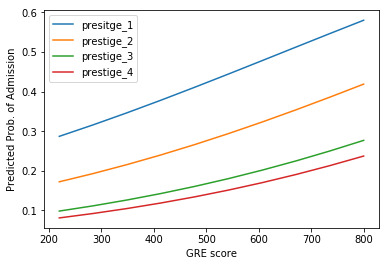

In [15]:
plt.plot(p1_x, p1_y)
plt.plot(p2_x, p2_y)
plt.plot(p3_x, p3_y)
plt.plot(p4_x, p4_y)

plt.ylabel('Predicted Prob. of Admission')
plt.xlabel('GRE score')
plt.legend(['presitge_1', 'prestige_2', 'prestige_3', 'prestige_4'])

We can see that while the predicted prob. of admission does go up as gre score goes up, there are large jumps in probability between prestige 1 and 2 schools, as well as between prestige 2 and 3 schools. However, between prestige 3 and 4 schools, the jump is not nearly as high, and makes a less significant difference.

We can do the same visualization for gpa and perhaps find something similar.

### Discussion: Write up your discussion and future steps

Answer: While this model is all fine and dandy, we didn't really implement ways of testing it (such as ROC/AUC scores). We also have been using the entire data set to train this model, so it's possible it may show overfitting when confronting new, unseen data. Perhaps the next step is to do cross-validation to better train the model and see the mean error between all the folds.

In addition we could also implement a different type of algoritm, like KNN. It's possible that there is clustering between the admitted data points and non admitted data points in n-dimensional space. As such, we can try to implement KNN to find if there is a way to partition the data in such way.

One more thing we could try is finding more comprehensive data. My ground truth tells me that there are more variables that, if added, can further enhance the accuracy of our model. While gpa, gre score, and prestige offer a lot of explanatory value, there may be other factors, like extra-curricular activities, that can explain "outlier" cases.